In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import math

%matplotlib inline

plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

#plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data = pd.read_parquet('../data/tokyo-clean.parquet')

In [3]:
# extremes seem to be errors - to be clipped

# highest trade prices
print(data.iloc[data.TradePriceYen.sort_values(ascending=False).head(10).index].TradePriceYen)

print()

# lowest trade prices
print(data.iloc[data.TradePriceYen.sort_values(ascending=False).tail(10).index].TradePriceYen)

232998    31000000000
395098    25000000000
71284     24000000000
466778    23000000000
81162     19000000000
446972    18000000000
124071    18000000000
72601     15000000000
178505    14000000000
229634    13000000000
Name: TradePriceYen, dtype: int64

484276    100000
442960    100000
203127     50000
434818     50000
49044      10000
97298       4000
144600      2700
27525       1200
368218      1000
97148        500
Name: TradePriceYen, dtype: int64


In [4]:
# Quantile cutoffs
lower_q = 0.005
upper_q = 0.995

low, high = data['TradePriceYen'].quantile([lower_q, upper_q])

data = data[(data['TradePriceYen'] >= low) & (data['TradePriceYen'] <= high)].copy()
data.reset_index(drop=True, inplace=True)

In [5]:
# highest trade prices (after clipping)
print(data.iloc[data.TradePriceYen.sort_values(ascending=False).head(10).index].TradePriceYen)

print()

# lowest trade prices (after clipping)
print(data.iloc[data.TradePriceYen.sort_values(ascending=False).tail(10).index].TradePriceYen)

498576    740000000
346047    740000000
354161    740000000
472468    740000000
212113    740000000
96448     740000000
346349    740000000
495685    740000000
298208    740000000
82471     740000000
Name: TradePriceYen, dtype: int64

146579    3400000
383586    3400000
95709     3400000
134522    3400000
68978     3400000
39985     3400000
324610    3400000
218311    3400000
324394    3400000
278265    3400000
Name: TradePriceYen, dtype: int64


In [6]:
data.head()

,PriceCategory,Type,Region,Prefecture,Municipality,DistrictName,TradePriceYen,FloorPlan,Area,LandShape,...,CoverageRatio,FloorAreaRatio,Renovation,Remarks,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter,TransactionQuarterEndDate
0,Real Estate Transaction Price Information,Residential Land(Land and Building),Commercial Area,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,14000000,None,120,Semi-rectangular Shaped,...,80,500,None,Dealings including private road,False,False,False,2010,2,2010-06-30
1,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",None,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,7300000,1K,20,None,...,80,600,Not yet,None,False,False,False,2010,2,2010-06-30
2,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",None,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,8200000,1K,20,None,...,80,700,Not yet,None,False,False,False,2010,2,2010-06-30
3,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",None,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,10000000,None,20,None,...,80,500,None,None,False,False,False,2010,2,2010-06-30
4,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",None,東京都 (Tokyo),千代田区 (Chiyoda Ward),Iwamotocho,11000000,1R,20,None,...,80,700,Not yet,None,False,False,False,2010,2,2010-06-30


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516729 entries, 0 to 516728
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   PriceCategory              516729 non-null  object        
 1   Type                       516729 non-null  object        
 2   Region                     166155 non-null  object        
 3   Prefecture                 516729 non-null  object        
 4   Municipality               516729 non-null  object        
 5   DistrictName               516691 non-null  object        
 6   TradePriceYen              516729 non-null  int64         
 7   FloorPlan                  340236 non-null  object        
 8   Area                       516729 non-null  int64         
 9   LandShape                  166100 non-null  object        
 10  Frontage                   151313 non-null  float64       
 11  TotalFloorArea             182956 non-null  Int64   

In [8]:
data.describe(include='all')

,PriceCategory,Type,Region,Prefecture,Municipality,DistrictName,TradePriceYen,FloorPlan,Area,LandShape,...,CoverageRatio,FloorAreaRatio,Renovation,Remarks,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter,TransactionQuarterEndDate
count,516729,516729,166155,516729,516729,516691,5.167290e+05,340236,516729.000000,166100,...,421964.0,421958.0,211390,23859,516729,516729,516729,516729.000000,516729.000000,516729
unique,2,2,4,1,59,1439,NaN,66,NaN,9,...,<NA>,<NA>,2,21,2,2,2,NaN,NaN,NaN
top,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",Residential Area,東京都 (Tokyo),世田谷区 (Setagaya Ward),Honcho,NaN,3LDK,NaN,Semi-rectangular Shaped,...,<NA>,<NA>,Not yet,Dealings including private road,False,False,False,NaN,NaN,NaN
freq,401928,326390,150554,516729,31018,3501,NaN,95429,NaN,57940,...,<NA>,<NA>,151595,17644,516479,516618,516473,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.229725e+07,NaN,80.665707,NaN,...,63.045971,276.355798,NaN,NaN,NaN,NaN,NaN,2018.615692,2.447900,2019-03-23 11:44:42.793495552
min,NaN,NaN,NaN,NaN,NaN,NaN,3.400000e+06,NaN,10.000000,NaN,...,20.0,15.0,NaN,NaN,NaN,NaN,NaN,2010.000000,1.000000,2010-03-31 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.400000e+07,NaN,45.000000,NaN,...,60.0,150.0,NaN,NaN,NaN,NaN,NaN,2015.000000,1.000000,2015-06-30 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.800000e+07,NaN,65.000000,NaN,...,60.0,200.0,NaN,NaN,NaN,NaN,NaN,2020.000000,2.000000,2020-03-31 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.900000e+07,NaN,95.000000,NaN,...,80.0,400.0,NaN,NaN,NaN,NaN,NaN,2022.000000,3.000000,2022-12-31 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,7.400000e+08,NaN,1900.000000,NaN,...,501.0,4080.0,NaN,NaN,NaN,NaN,NaN,2025.000000,4.000000,2025-06-30 00:00:00


In [9]:
data.isnull().sum().sort_values(ascending=False)

Remarks                      492870
Frontage                     365416
LandShape                    350629
Region                       350574
TotalFloorArea               333773
Breadth                      332358
Classification               330805
RoadDirection                330218
Renovation                   305339
Purpose                      231256
FloorPlan                    176493
Use                          154213
FloorAreaRatio                94771
CoverageRatio                 94765
BuildingYear                  18003
Structure                     14789
CityPlanning                  13063
DistrictName                     38
FrontageCapped                    0
TotalFloorAreaCapped              0
BuildingYearFloored               0
TransactionYear                   0
TransactionQuarter                0
PriceCategory                     0
Type                              0
Area                              0
TradePriceYen                     0
Municipality                

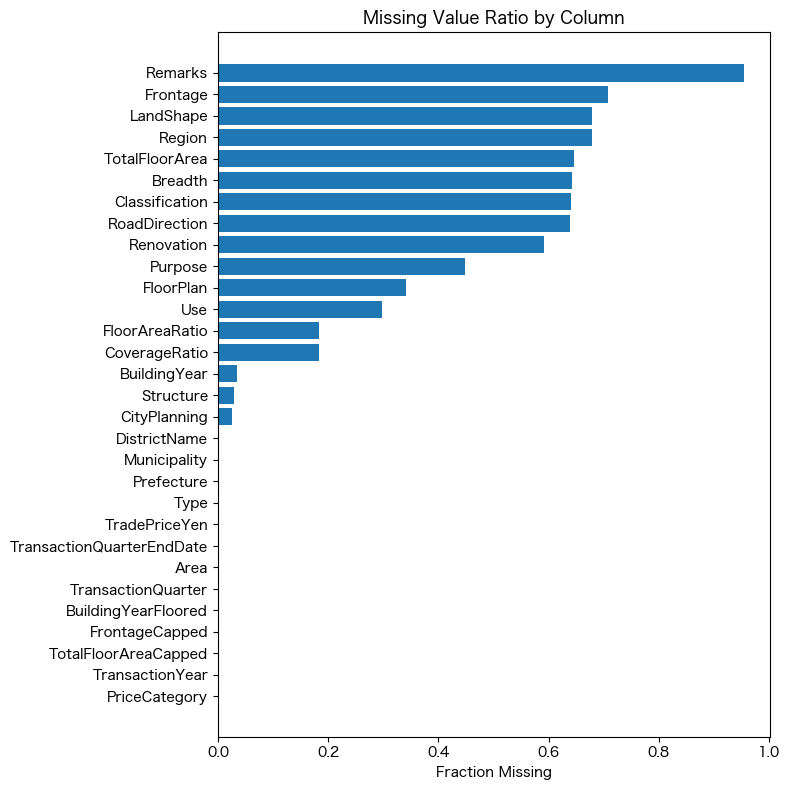

In [10]:
# proportion of missing values

missing_ratio = data.isna().mean().sort_values()

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(missing_ratio.index, missing_ratio.values)
ax.set_title("Missing Value Ratio by Column")
ax.set_xlabel("Fraction Missing")
plt.tight_layout()

In [11]:
data.nunique().sort_values()

Prefecture                      1
PriceCategory                   2
Type                            2
TotalFloorAreaCapped            2
FrontageCapped                  2
BuildingYearFloored             2
Renovation                      2
Region                          4
TransactionQuarter              4
Purpose                         6
RoadDirection                   9
LandShape                       9
Classification                 15
TransactionYear                16
CityPlanning                   16
Remarks                        21
Structure                      24
CoverageRatio                  40
Municipality                   59
TransactionQuarterEndDate      62
FloorPlan                      66
BuildingYear                   83
FloorAreaRatio                120
TotalFloorArea                156
Area                          170
Use                           210
TradePriceYen                 221
Breadth                       357
Frontage                      433
DistrictName  

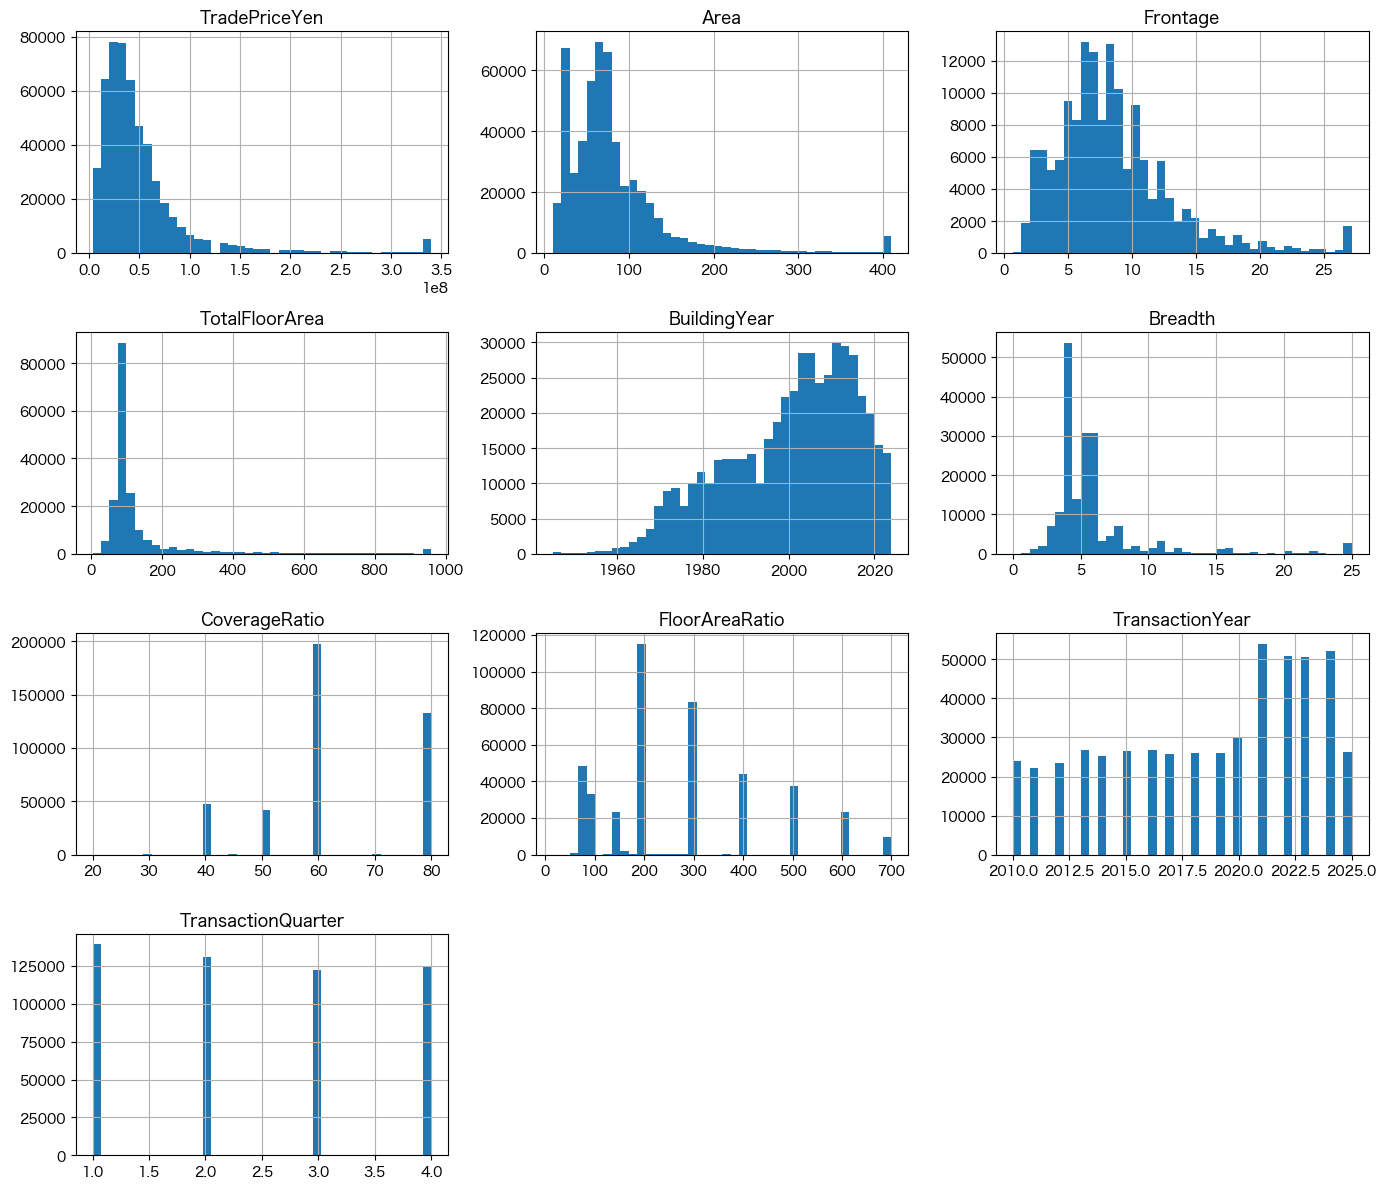

In [12]:
num_cols = data.select_dtypes(include='number').columns

# clip each numeric column at its 99th percentile
clipped = data[num_cols].clip(upper=data[num_cols].quantile(0.99), axis=1)

clipped.hist(figsize=(14, 12), bins=40)
plt.tight_layout()

In [13]:
# correlations

corr = data.corr(numeric_only=True)
corr_sorted = corr.sort_values(by="TradePriceYen", ascending=False)
corr_sorted

,TradePriceYen,Area,Frontage,TotalFloorArea,BuildingYear,Breadth,CoverageRatio,FloorAreaRatio,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter
TradePriceYen,1.000000,0.500753,0.069741,0.427811,0.104484,0.255827,0.018041,0.026835,0.001711,0.055647,0.143481,0.107013,-0.006451
Area,0.500753,1.000000,0.230418,0.428463,-0.048175,0.138183,-0.290544,-0.290941,0.008335,0.183812,0.194726,-0.056272,-0.000006
TotalFloorArea,0.427811,0.428463,0.128979,1.000000,-0.108644,0.184652,0.138651,0.181946,0.004010,0.120058,0.921399,-0.034990,-0.001568
Breadth,0.255827,0.138183,0.027836,0.184652,-0.110589,1.000000,0.239819,0.329013,-0.000101,0.024987,0.069478,-0.027143,0.001056
TotalFloorAreaCapped,0.143481,0.194726,0.099255,0.921399,-0.020011,0.069478,0.009213,0.009152,0.003465,0.094623,1.000000,-0.014500,-0.001133
TransactionYear,0.107013,-0.056272,0.000862,-0.034990,0.116799,-0.027143,-0.010594,-0.028345,-0.010809,-0.004591,-0.014500,1.000000,-0.070593
BuildingYear,0.104484,-0.048175,-0.024294,-0.108644,1.000000,-0.110589,-0.145725,-0.137403,-0.082337,-0.010384,-0.020011,0.116799,-0.005829
Frontage,0.069741,0.230418,1.000000,0.128979,-0.024294,0.027836,0.002765,-0.000710,-0.000719,0.999841,0.099255,0.000862,-0.001830
FrontageCapped,0.055647,0.183812,0.999841,0.120058,-0.010384,0.024987,-0.006045,-0.008800,-0.000322,1.000000,0.094623,-0.004591,-0.000436
FloorAreaRatio,0.026835,-0.290941,-0.000710,0.181946,-0.137403,0.329013,0.819792,1.000000,0.004113,-0.008800,0.009152,-0.028345,0.004026


<Axes: >

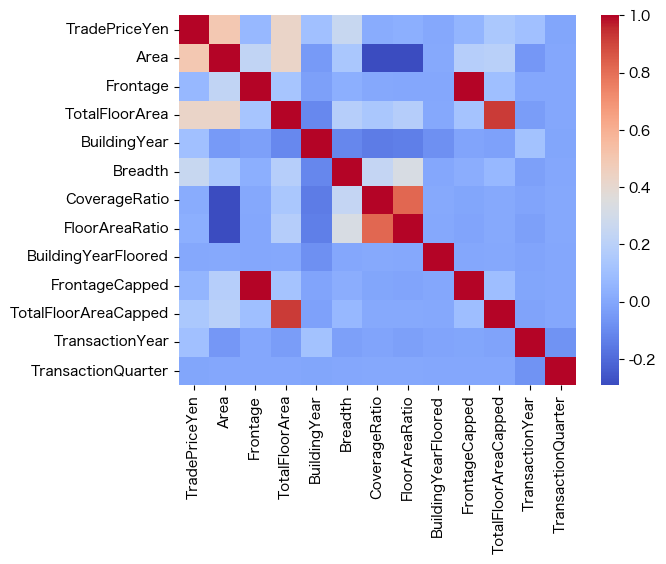

In [14]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm')

In [15]:
# Japanese-style 万円 formatter
def yen_man_formatter(x, pos):
    return f"{x/1e4:,.0f}万円"

# add log trade price
latest_year = data['TransactionYear'].max()

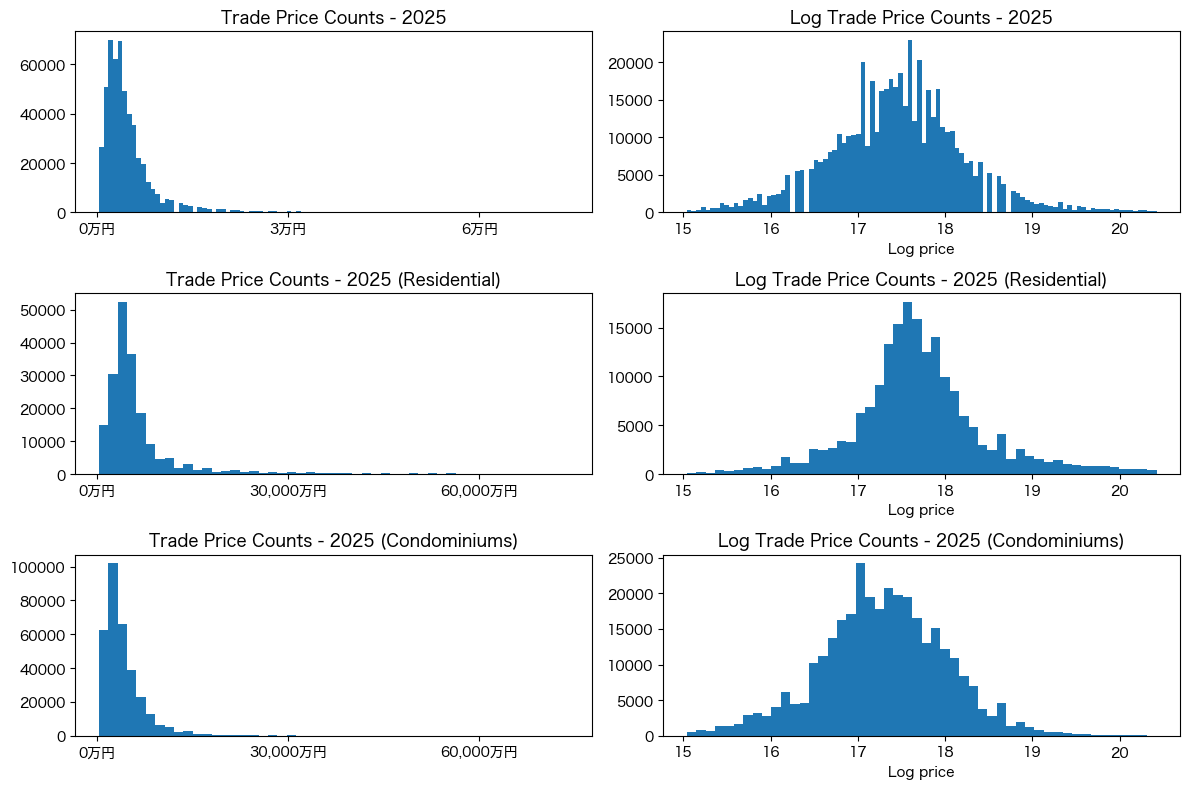

In [16]:
# todo: clip these to remove the outliers that are extending the linear plot

data['LogTradePriceYen'] = np.log(data['TradePriceYen'])

fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Linear - all
axes[0, 0].hist(data['TradePriceYen']/1e4, bins=100)
axes[0, 0].set_title(f"Trade Price Counts - {latest_year}")
axes[0, 0].xaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(3))

# Log - all
axes[0, 1].hist(data['LogTradePriceYen'], bins=100)
axes[0, 1].set_title(f"Log Trade Price Counts - {latest_year}")
axes[0, 1].set_xlabel("Log price")

# Linear - residential
axes[1, 0].hist(data[data['Type'] == 'Residential Land(Land and Building)']['TradePriceYen'], bins=50)
axes[1, 0].set_title(f"Trade Price Counts - {latest_year} (Residential)")
axes[1, 0].xaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
axes[1, 0].xaxis.set_major_locator(plt.MaxNLocator(3))

# Log - residential
axes[1, 1].hist(data[data['Type'] == 'Residential Land(Land and Building)']['LogTradePriceYen'], bins=50)
axes[1, 1].set_title(f"Log Trade Price Counts - {latest_year} (Residential)")
axes[1, 1].set_xlabel("Log price")

# Linear - condominiums
axes[2, 0].hist(data[data['Type'] == 'Pre-owned Condominiums, etc.']['TradePriceYen'], bins=50)
axes[2, 0].set_title(f"Trade Price Counts - {latest_year} (Condominiums)")
axes[2, 0].xaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
axes[2, 0].xaxis.set_major_locator(plt.MaxNLocator(3))

# Log - condominiums
axes[2, 1].hist(data[data['Type'] == 'Pre-owned Condominiums, etc.']['LogTradePriceYen'], bins=50)
axes[2, 1].set_title(f"Log Trade Price Counts - {latest_year} (Condominiums)")
axes[2, 1].set_xlabel("Log price")

plt.tight_layout()

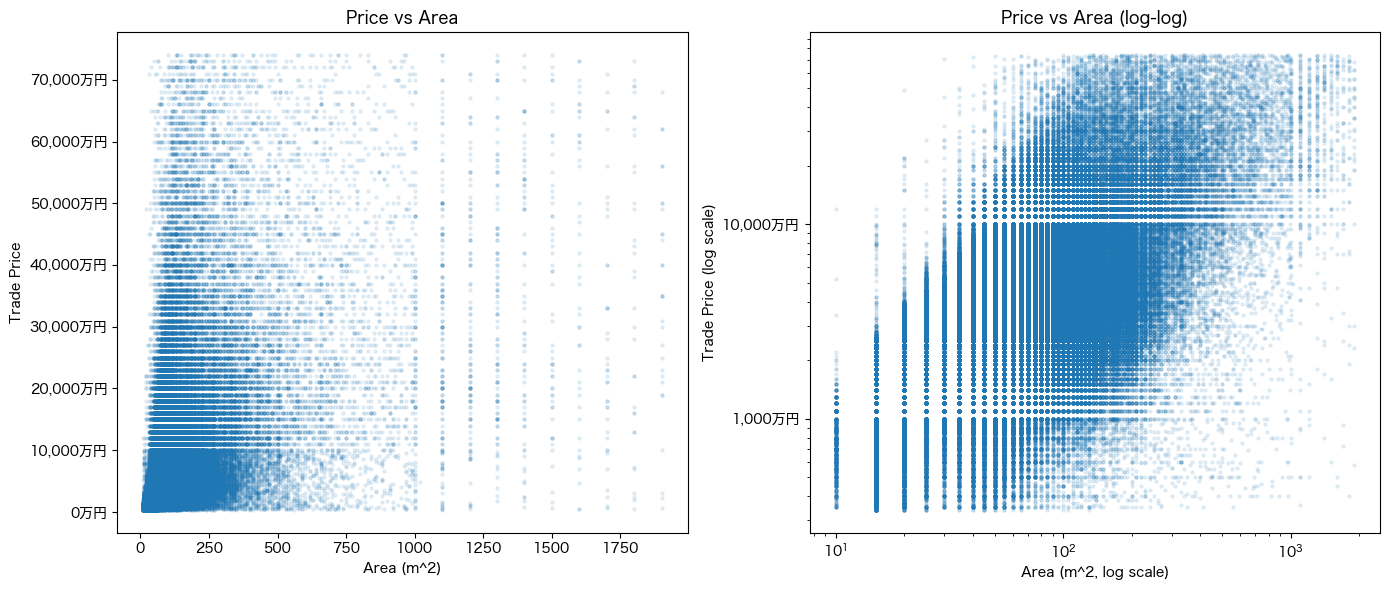

In [17]:
# plot log-log to adjust visualization for skew on the visualization
# note that MLIT rounds lot sizes 

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(data['Area'], data['TradePriceYen'], s=5, alpha=0.1)
ax[0].set_xlabel("Area (m^2)")
ax[0].set_ylabel("Trade Price")
ax[0].yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
ax[0].set_title("Price vs Area")

ax[1].scatter(data['Area'], data['TradePriceYen'], s=5, alpha=0.1)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel("Area (m^2, log scale)")
ax[1].set_ylabel("Trade Price (log scale)")
ax[1].yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
ax[1].set_title("Price vs Area (log-log)")

plt.tight_layout()

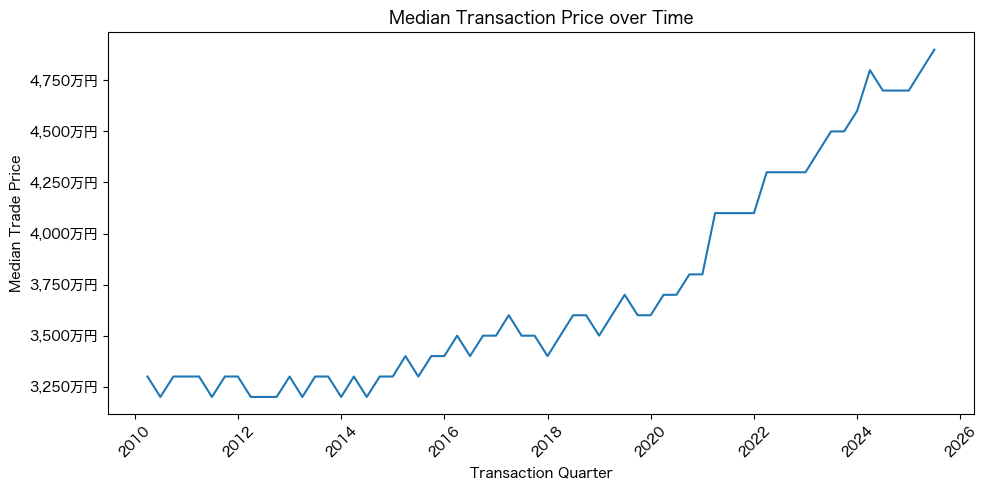

In [18]:
# time series of median trade prices

ts = (
    data
    .groupby('TransactionQuarterEndDate')['TradePriceYen']
    .median()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ts.index, ts.values)
ax.set_title("Median Transaction Price over Time")
ax.set_xlabel("Transaction Quarter")
ax.set_ylabel("Median Trade Price")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
plt.xticks(rotation=45)
plt.tight_layout()


Most Expensive Municipalities - Median Transaction Prices (万円):
Municipality
港区 (Minato Ward)       11000
中央区 (Chuo Ward)        10000
渋谷区 (Shibuya Ward)      8100
千代田区 (Chiyoda Ward)     7850
目黒区 (Meguro Ward)       7700
Name: TradePriceYen, dtype: int64

Least Expensive Municipalities - Median Transaction Prices (万円):
Municipality
世田谷区 (Setagaya Ward)     7000
品川区 (Shinagawa Ward)     6600
杉並区 (Suginami Ward)      6500
武蔵野市 (Musashino City)    6500
江東区 (Koto Ward)          6200
Name: TradePriceYen, dtype: int64



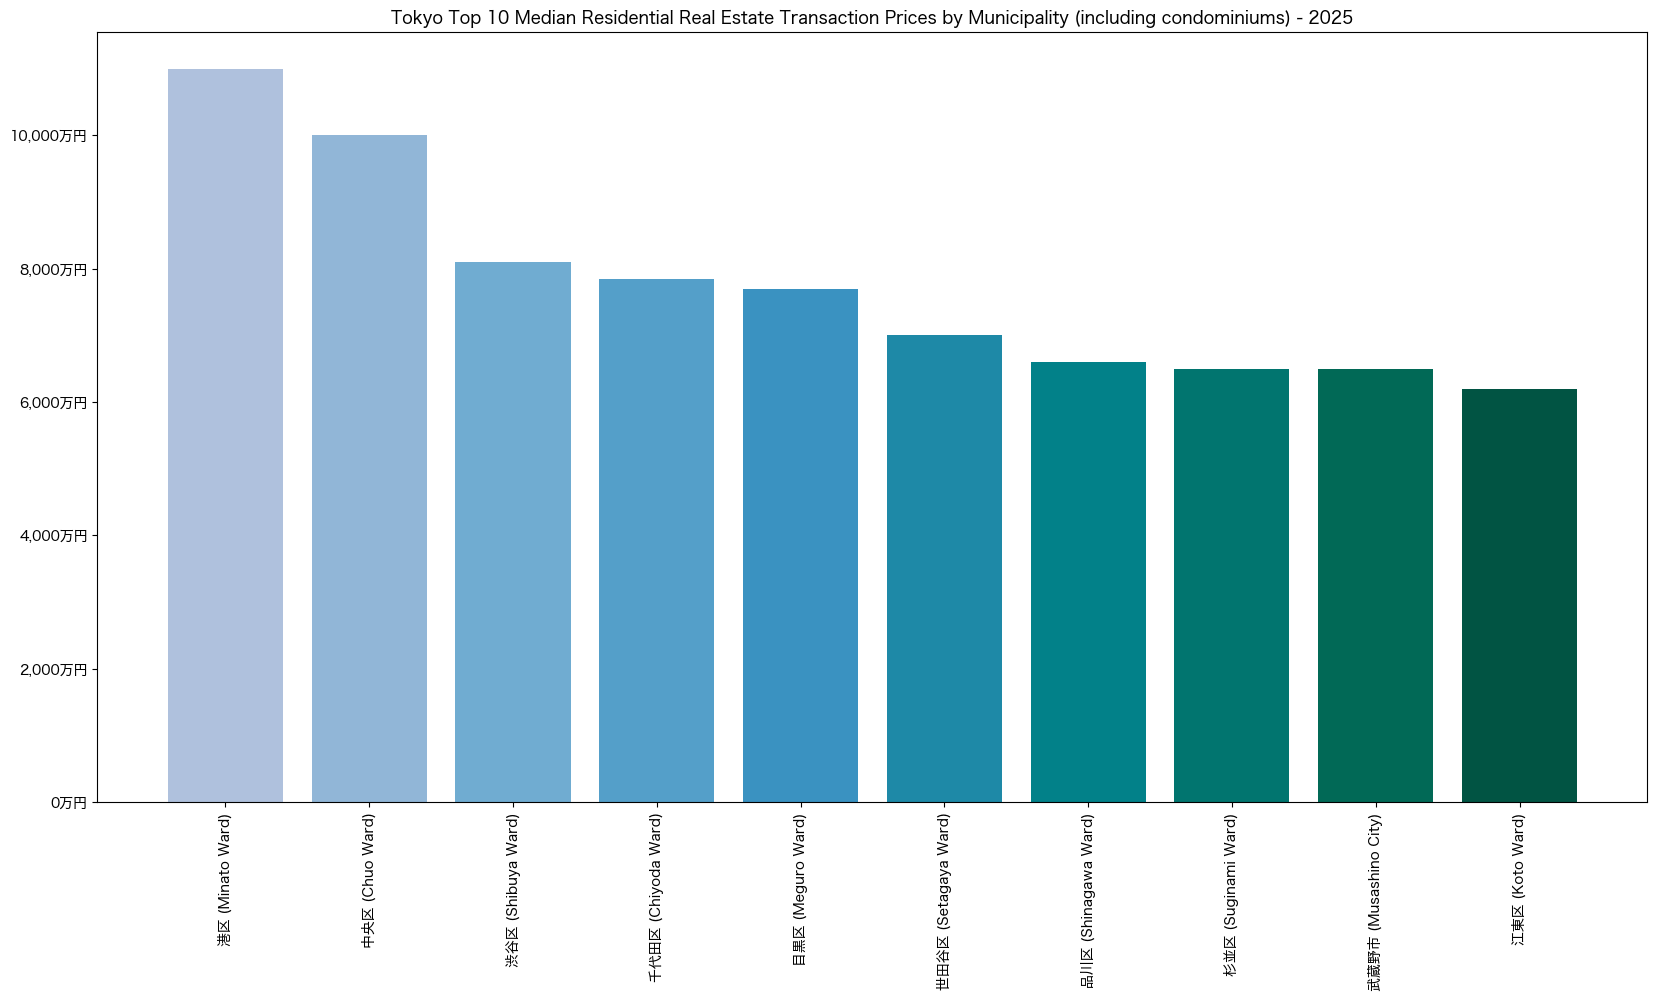

In [19]:
# Sorted average price series in 万円, for residential real estate in the most recent year available
med_prices = (data[(data['TransactionYear'] == latest_year)]
                      .groupby('Municipality')['TradePriceYen']
                      .median()
                      .sort_values(ascending=False)).head(10)

print("Most Expensive Municipalities - Median Transaction Prices (万円):")
print((med_prices.head()/1e4).astype(int))
print()

print("Least Expensive Municipalities - Median Transaction Prices (万円):")
print((med_prices.tail()/1e4).astype(int))
print()


fig, ax = plt.subplots(figsize=(20, 10))
colors = plt.cm.PuBuGn(np.linspace(0.35, 0.95, len(med_prices)))

ax.bar(med_prices.index, med_prices.values, color=colors)
ax.set_title(f"Tokyo Top 10 Median Residential Real Estate Transaction Prices by Municipality (including condominiums) - {latest_year}")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))

plt.xticks(rotation=90)
plt.show()

/var/folders/sr/1p8qj1zn0yl22k2fdqz03b080000gn/T/ipykernel_42056/3553845934.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_price = tmp.groupby('AgeBin')['TradePriceYen'].median()


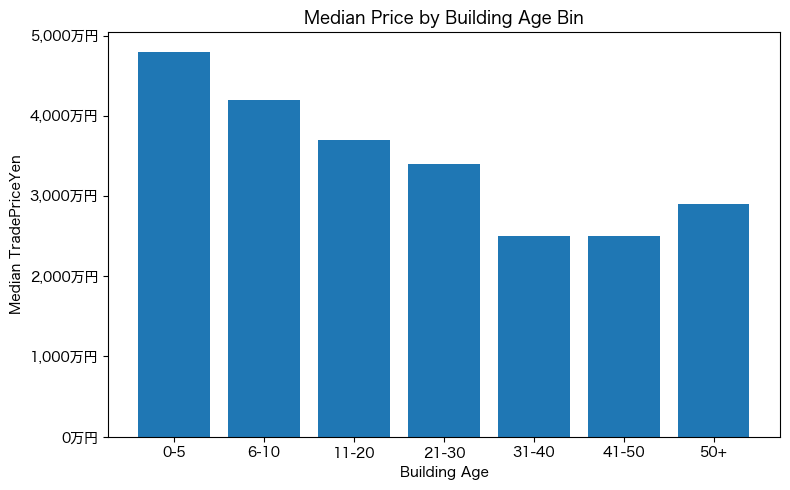

In [20]:
# Filter out missing / weird years
mask = (data['BuildingYearFloored'] == 0) & (data['BuildingYear'] <= data['TransactionYear'])
tmp = data[mask].copy()
tmp['BuildingAge'] = tmp['TransactionYear'] - tmp['BuildingYear']

# Bin ages
bins = [0, 5, 10, 20, 30, 40, 50, 100]
labels = ["0-5", "6-10", "11-20", "21-30", "31-40", "41-50", "50+"]
tmp['AgeBin'] = pd.cut(tmp['BuildingAge'], bins=bins, labels=labels, right=True)

age_price = tmp.groupby('AgeBin')['TradePriceYen'].median()

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(age_price.index.astype(str), age_price.values)
ax.set_title("Median Price by Building Age Bin")
ax.set_xlabel("Building Age")
ax.set_ylabel("Median TradePriceYen")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
plt.tight_layout()


/var/folders/sr/1p8qj1zn0yl22k2fdqz03b080000gn/T/ipykernel_42056/2017575758.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  far_price = tmp.groupby('FAR_bin')['TradePriceYen'].median()


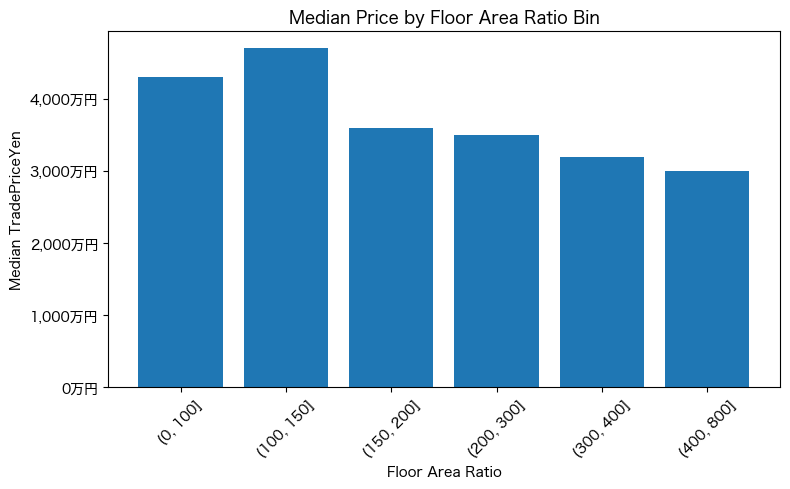

In [21]:
# Relationship with FloorAreaRatio (binned)
tmp = data.dropna(subset=['FloorAreaRatio']).copy()
bins = [0, 100, 150, 200, 300, 400, 800]
tmp['FAR_bin'] = pd.cut(tmp['FloorAreaRatio'], bins=bins)

far_price = tmp.groupby('FAR_bin')['TradePriceYen'].median()

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar([str(b) for b in far_price.index], far_price.values)
ax.set_title("Median Price by Floor Area Ratio Bin")
ax.set_xlabel("Floor Area Ratio")
ax.set_ylabel("Median TradePriceYen")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
plt.xticks(rotation=45)
plt.tight_layout()


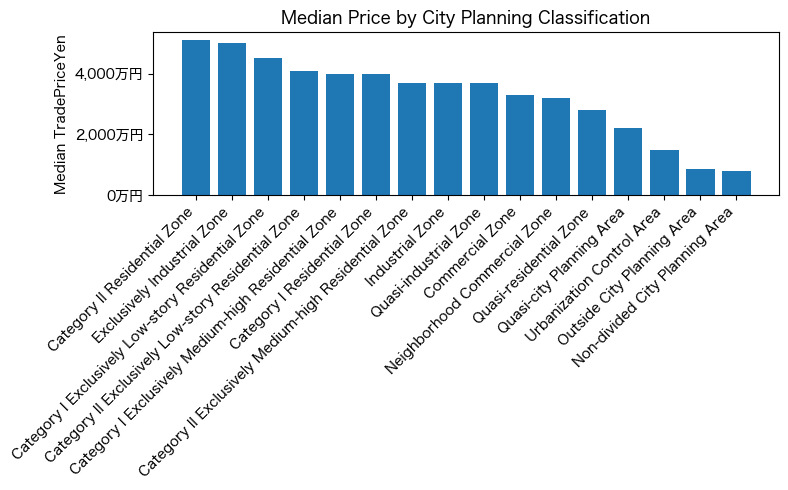

In [22]:
cp_price = (
    data.dropna(subset=['CityPlanning'])
        .groupby('CityPlanning')['TradePriceYen']
        .median()
        .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(cp_price.index, cp_price.values)
ax.set_title("Median Price by City Planning Classification")
ax.set_ylabel("Median TradePriceYen")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


/var/folders/sr/1p8qj1zn0yl22k2fdqz03b080000gn/T/ipykernel_42056/3671178420.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = tmp.groupby('bin')['TradePriceYen'].median()
/var/folders/sr/1p8qj1zn0yl22k2fdqz03b080000gn/T/ipykernel_42056/3671178420.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = tmp.groupby('bin')['TradePriceYen'].median()
/var/folders/sr/1p8qj1zn0yl22k2fdqz03b080000gn/T/ipykernel_42056/3671178420.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

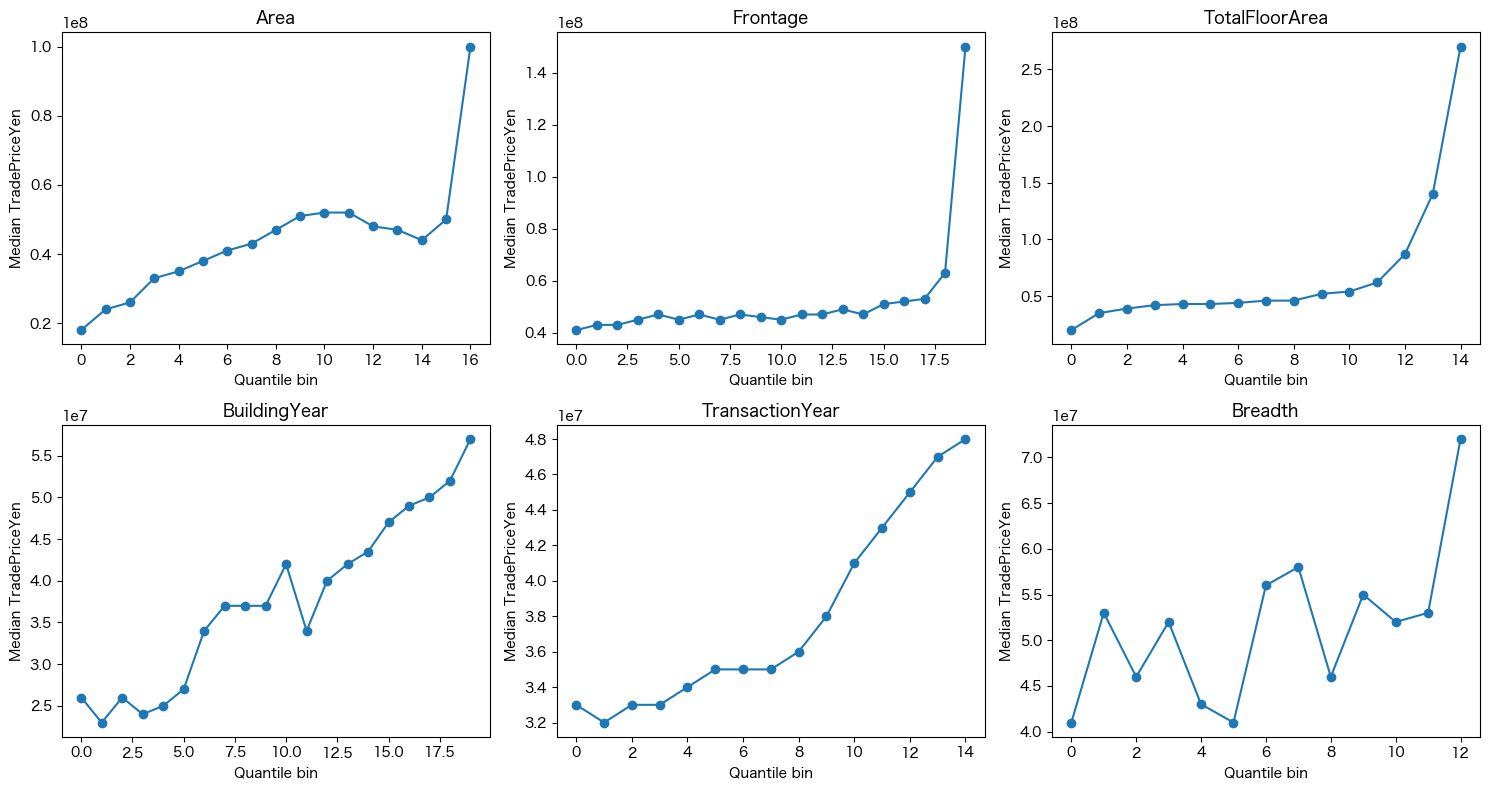

In [23]:
# todo: remove outliers from area, frontage, totalfloorarea
# add feature: buildingage = transactionyear - buildingyear

features = ['Area', 'Frontage', 'TotalFloorArea', 'BuildingYear', 'TransactionYear', 'Breadth']

n = len(features)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for ax, col in zip(axes, features):
    tmp = data[[col, 'TradePriceYen']].dropna()
    tmp['bin'] = pd.qcut(tmp[col], q=20, duplicates='drop')
    agg = tmp.groupby('bin')['TradePriceYen'].median()
    
    ax.plot(range(len(agg)), agg.values, marker='o')
    ax.set_title(col)
    ax.set_xlabel("Quantile bin")
    ax.set_ylabel("Median TradePriceYen")
    #ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))

# Hide any unused subplots
for ax in axes[len(features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()
